In [9]:
import pandas as pd

In [1]:
pwd

u'/Users/matthewmitchell/Desktop'

In [47]:
#Data Downloaded from the FEC
#http://www.fec.gov/pubrec/electionresults.shtml

#Import
df_2012=pd.read_csv('2012pres-2.csv')

#Cleaning Performed
df_2012=df_2012.drop([0,1,2,3])
df_2012=df_2012.reset_index(drop=True)
df_2012.columns=['State','Dem_EC','Rep_EC','Dem_Votes','Rep_Votes','Other_votes','Total_votes','7','8']
df_2012=df_2012.drop(['7','8'],axis=1)
df_2012.head()

,State,Dem_EC,Rep_EC,Dem_Votes,Rep_Votes,Other_votes,Total_votes
0,AL,NaN,9,"795,696","1,255,925","22,717","2,074,338"
1,AK,NaN,3,"122,640","164,676","13,179","300,495"
2,AZ,NaN,11,"1,025,232","1,233,654","40,368","2,299,254"
3,AR,NaN,6,"394,409","647,744","27,315","1,069,468"
4,CA,55,NaN,"7,854,285","4,839,958","344,304","13,038,547"


In [49]:
df_2008=pd.read_csv('2008pres.csv')
df_2008.head(50)

/Users/matthewmitchell/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


,1,FEC ID,STATE,STATE ABBREVIATION,GENERAL ELECTION DATE,FIRST NAME,LAST NAME,"LAST NAME, FIRST",TOTAL VOTES,PARTY,GENERAL RESULTS,TOTAL VOTES #,GENERAL %,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2,P80002801,Alabama,AL,11/4/08,John,McCain,"McCain, John",NaN,R,"1,266,546",NaN,60.32%,NaN,NaN,NaN,NaN
1,3,P80003338,Alabama,AL,11/4/08,Barack,Obama,"Obama, Barack",NaN,D,"813,479",NaN,38.74%,NaN,NaN,NaN,NaN
2,4,P20000527,Alabama,AL,11/4/08,Ralph,Nader,"Nader, Ralph",NaN,I,"6,788",NaN,0.32%,NaN,NaN,NaN,NaN
3,5,P80005580,Alabama,AL,11/4/08,Bob,Barr,"Barr, Bob",NaN,I,"4,991",NaN,0.24%,NaN,NaN,NaN,NaN
4,6,P80005499,Alabama,AL,11/4/08,Chuck,Baldwin,"Baldwin, Chuck",NaN,I,"4,310",NaN,0.21%,NaN,NaN,NaN,NaN


In [52]:
cd 2016-us-election-2/

/Users/matthewmitchell/Desktop/2016-us-election-2


In [53]:
ls

county_facts.csv*            database.sqlite*
county_facts_dictionary.csv* hashes.txt*
county_shapefiles/           primary_results.csv*


In [65]:
df_2016=pd.read_csv('primary_results.csv')
df_2016[df_2016.county=='Laramie'].head(500)

,state,state_abbreviation,county,fips,party,candidate,votes,fraction_votes
24537,Wyoming,WY,Laramie,56021,Democrat,Bernie Sanders,25,0.490
24538,Wyoming,WY,Laramie,56021,Democrat,Hillary Clinton,26,0.510
24591,Wyoming,WY,Laramie,95600036,Republican,Donald Trump,0,0.000
24592,Wyoming,WY,Laramie,95600036,Republican,John Kasich,0,0.000
24593,Wyoming,WY,Laramie,95600036,Republican,Marco Rubio,38,0.176
24594,Wyoming,WY,Laramie,95600036,Republican,Ted Cruz,141,0.653


In [57]:
df_2016.groupby(['state','candidate']).votes

In [12]:
pwd

u'/Users/matthewmitchell/Desktop'

In [13]:
cd Election_Data_csv/

/Users/matthewmitchell/Desktop/Election_Data_csv


In [60]:
df_2012_county=pd.read_csv('2012_General_County.csv')
df_2012_county.head()

,State Postal,County Name,FIPS,Obama vote,%,Romney vote,%.1
0,AK,Alaska,0,"91,696",41.6,"121,234",55
1,AK,Alaska,2000,"91,696",41.6,"121,234",55
2,AL,Alabama,0,"793,620",38.4,"1,252,453",60.7
3,AL,Autauga,1001,"6,354",26.6,"17,366",72.6
4,AL,Baldwin,1003,"18,329",21.6,"65,772",77.4


In [62]:
df_2012_county.columns=[u'State', u'County', u'FIPS', u'Obama_vote', u'Obama_P',
       u'Romney_vote', u'Romney_P']

In [63]:
df_2012_county.head()

,State,County,FIPS,Obama_vote,Obama_P,Romney_vote,Romney_P
0,AK,Alaska,0,"91,696",41.6,"121,234",55
1,AK,Alaska,2000,"91,696",41.6,"121,234",55
2,AL,Alabama,0,"793,620",38.4,"1,252,453",60.7
3,AL,Autauga,1001,"6,354",26.6,"17,366",72.6
4,AL,Baldwin,1003,"18,329",21.6,"65,772",77.4


In [65]:
df_2012_county.Obama_vote=df_2012_county.Obama_vote.str.replace(",","")
df_2012_county.Romney_vote=df_2012_county.Romney_vote.str.replace(",","")
df_2012_county.Obama_vote=df_2012_county.Obama_vote.astype(float)
df_2012_county.Romney_vote=df_2012_county.Romney_vote.astype(float)
df_2012_county.Obama_P=df_2012_county.Obama_vote/(df_2012_county.Obama_vote+df_2012_county.Romney_vote)
df_2012_county.Romney_P=df_2012_county.Romney_vote/(df_2012_county.Obama_vote+df_2012_county.Romney_vote)
df_2012_county.head()

,State,County,FIPS,Obama_vote,Obama_P,Romney_vote,Romney_P
0,AK,Alaska,0,91696,0.430639,121234,0.569361
1,AK,Alaska,2000,91696,0.430639,121234,0.569361
2,AL,Alabama,0,793620,0.387875,1252453,0.612125
3,AL,Autauga,1001,6354,0.267875,17366,0.732125
4,AL,Baldwin,1003,18329,0.217940,65772,0.782060


In [66]:
df_2012_state=df_2012_county[df_2012_county.FIPS==0]
df_2012_state.head()

,State,County,FIPS,Obama_vote,Obama_P,Romney_vote,Romney_P
0,AK,Alaska,0,91696,0.430639,121234,0.569361
2,AL,Alabama,0,793620,0.387875,1252453,0.612125
70,AR,Arkansas,0,391953,0.378454,643717,0.621546
145,AZ,Arizona,0,900081,0.448424,1107130,0.551576
161,CA,California,0,6241648,0.606682,4046524,0.393318


In [67]:
df_2012_county=df_2012_county[df_2012_county.FIPS!=0]
df_2012_county.head()

,State,County,FIPS,Obama_vote,Obama_P,Romney_vote,Romney_P
1,AK,Alaska,2000,91696,0.430639,121234,0.569361
3,AL,Autauga,1001,6354,0.267875,17366,0.732125
4,AL,Baldwin,1003,18329,0.217940,65772,0.782060
5,AL,Barbour,1005,5873,0.514634,5539,0.485366
6,AL,Bibb,1007,2200,0.264074,6131,0.735926


In [68]:
df_2012_check_state_tot=df_2012_county.groupby('State').sum()
df_2012_check_state_tot.head()

,FIPS,Obama_vote,Obama_P,Romney_vote,Romney_P
State,,,,,
AK,2000,91696,0.430639,121234,0.569361
AL,71489,793620,25.923433,1252453,41.076567
AR,375624,389499,26.530302,639825,47.469698
AZ,60208,900081,6.662870,1107130,8.337130
CA,351364,6241648,30.420282,4046524,27.579718


###Totals seem to check out

In [69]:
df_2012_county_pop=pd.read_csv('ACS_12_1YR_B01003.csv')

In [79]:
df_2012_county_pop.columns=['ID','FIPS','Geography','Population_Estimate','Blank']
df_2012_county_pop=df_2012_county_pop.drop('Blank', axis=1)

In [80]:
df_2012_county_pop.head()

,ID,FIPS,Geography,Population_Estimate
0,0500000US01003,1003,"Baldwin County, Alabama",190790
1,0500000US01015,1015,"Calhoun County, Alabama",117296
2,0500000US01043,1043,"Cullman County, Alabama",80440
3,0500000US01049,1049,"DeKalb County, Alabama",71080
4,0500000US01051,1051,"Elmore County, Alabama",80629


In [82]:
df_2012_master=pd.merge(df_2012_county,df_2012_county_pop)

In [83]:
df_2012_master.head()

,State,County,FIPS,Obama_vote,Obama_P,Romney_vote,Romney_P,ID,Geography,Population_Estimate
0,AL,Baldwin,1003,18329,0.217940,65772,0.782060,0500000US01003,"Baldwin County, Alabama",190790
1,AL,Calhoun,1015,15500,0.338635,30272,0.661365,0500000US01015,"Calhoun County, Alabama",117296
2,AL,Cullman,1043,4855,0.148086,27930,0.851914,0500000US01043,"Cullman County, Alabama",80440
3,AL,DeKalb,1049,5235,0.222284,18316,0.777716,0500000US01049,"DeKalb County, Alabama",71080
4,AL,Elmore,1051,8940,0.254245,26223,0.745755,0500000US01051,"Elmore County, Alabama",80629


In [86]:
df_2012_master.rename(columns={'Obama_P':'Obama_Percent_Vote', 'Romney_P':'Romney_Percent_Vote'}, inplace=True)

In [87]:
df_2012_master.head()

,State,County,FIPS,Obama_vote,Obama_Percent_Vote,Romney_vote,Romney_Percent_Vote,ID,Geography,Population_Estimate
0,AL,Baldwin,1003,18329,0.217940,65772,0.782060,0500000US01003,"Baldwin County, Alabama",190790
1,AL,Calhoun,1015,15500,0.338635,30272,0.661365,0500000US01015,"Calhoun County, Alabama",117296
2,AL,Cullman,1043,4855,0.148086,27930,0.851914,0500000US01043,"Cullman County, Alabama",80440
3,AL,DeKalb,1049,5235,0.222284,18316,0.777716,0500000US01049,"DeKalb County, Alabama",71080
4,AL,Elmore,1051,8940,0.254245,26223,0.745755,0500000US01051,"Elmore County, Alabama",80629


In [88]:
df_2012_master['Obama_Percent_Pop']=df_2012_master.Obama_vote/df_2012_master.Population_Estimate
df_2012_master['Romney_Percent_Pop']=df_2012_master.Romney_vote/df_2012_master.Population_Estimate

In [89]:
df_2012_master.head()

,State,County,FIPS,Obama_vote,Obama_Percent_Vote,Romney_vote,Romney_Percent_Vote,ID,Geography,Population_Estimate,Obama_Percent_Pop,Romney_Percent_Pop
0,AL,Baldwin,1003,18329,0.217940,65772,0.782060,0500000US01003,"Baldwin County, Alabama",190790,0.096069,0.344735
1,AL,Calhoun,1015,15500,0.338635,30272,0.661365,0500000US01015,"Calhoun County, Alabama",117296,0.132144,0.258082
2,AL,Cullman,1043,4855,0.148086,27930,0.851914,0500000US01043,"Cullman County, Alabama",80440,0.060356,0.347215
3,AL,DeKalb,1049,5235,0.222284,18316,0.777716,0500000US01049,"DeKalb County, Alabama",71080,0.073649,0.257681
4,AL,Elmore,1051,8940,0.254245,26223,0.745755,0500000US01051,"Elmore County, Alabama",80629,0.110878,0.325230


In [90]:
df_2012_master['Total_Percent_Pop_Voting']=df_2012_master.Obama_Percent_Pop + df_2012_master.Romney_Percent_Pop

In [93]:
df_2012_master.sort_index(by='Total_Percent_Pop_Voting', ascending=False).head(50)

,State,County,FIPS,Obama_vote,Obama_Percent_Vote,Romney_vote,Romney_Percent_Vote,ID,Geography,Population_Estimate,Obama_Percent_Pop,Romney_Percent_Pop,Total_Percent_Pop_Voting
1432,WI,Ozaukee,55089,19075,0.346402,35991,0.653598,0500000US55089,"Ozaukee County, Wisconsin",86823,0.219700,0.414533,0.634233
1440,WI,Waukesha,55133,77617,0.324507,161567,0.675493,0500000US55133,"Waukesha County, Wisconsin",392292,0.197855,0.411854,0.609709
1421,WI,Dane,55025,215389,0.720731,83459,0.279269,0500000US55025,"Dane County, Wisconsin",503523,0.427764,0.165750,0.593514
1364,VA,James City,51095,17854,0.438846,22830,0.561154,0500000US51095,"James City County, Virginia",68967,0.258877,0.331028,0.589905
1439,WI,Washington,55131,23136,0.297206,54709,0.702794,0500000US55131,"Washington County, Wisconsin",132661,0.174399,0.412397,0.586796
1362,VA,Hanover,51085,18283,0.314125,39920,0.685875,0500000US51085,"Hanover County, Virginia",100668,0.181617,0.396551,0.578168
1357,VA,Bedford,51019,10925,0.271726,29281,0.728274,0500000US51019,"Bedford County, Virginia",69590,0.156991,0.420764,0.577755
818,MN,Washington,27163,70203,0.503825,69137,0.496175,0500000US27163,"Washington County, Minnesota",244088,0.287613,0.283246,0.570860
1368,VA,Roanoke,51161,19589,0.370072,33344,0.629928,0500000US51161,"Roanoke County, Virginia",92901,0.210859,0.358920,0.569779
814,MN,St. Louis,27137,74177,0.651521,39675,0.348479,0500000US27137,"St. Louis County, Minnesota",200319,0.370294,0.198059,0.568353


In [95]:
df_2012_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1449
Data columns (total 13 columns):
State                       1450 non-null object
County                      1450 non-null object
FIPS                        1450 non-null int64
Obama_vote                  1450 non-null float64
Obama_Percent_Vote          1450 non-null float64
Romney_vote                 1450 non-null float64
Romney_Percent_Vote         1450 non-null float64
ID                          1450 non-null object
Geography                   1450 non-null object
Population_Estimate         1450 non-null int64
Obama_Percent_Pop           1450 non-null float64
Romney_Percent_Pop          1450 non-null float64
Total_Percent_Pop_Voting    1450 non-null float64
dtypes: float64(7), int64(2), object(4)
memory usage: 158.6+ KB


In [96]:
df_2012_county.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4026 entries, 1 to 4073
Data columns (total 7 columns):
State          4026 non-null object
County         4026 non-null object
FIPS           4026 non-null int64
Obama_vote     4026 non-null float64
Obama_P        4024 non-null float64
Romney_vote    4026 non-null float64
Romney_P       4024 non-null float64
dtypes: float64(4), int64(1), object(2)
memory usage: 251.6+ KB


In [97]:
df_2012_county_pop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 814 entries, 0 to 813
Data columns (total 4 columns):
ID                     814 non-null object
FIPS                   814 non-null int64
Geography              814 non-null object
Population_Estimate    814 non-null int64
dtypes: int64(2), object(2)
memory usage: 31.8+ KB


In [102]:
df_2012_county_pop_full=pd.read_csv('ACS_12_5YR_B01003.csv')
df_2012_county_pop_full.head()

,Id,FIPS,Geography,Pop_Estimate,Unnamed: 4
0,0500000US01001,1001,"Autauga County, Alabama",54590,NaN
1,0500000US01003,1003,"Baldwin County, Alabama",183226,NaN
2,0500000US01005,1005,"Barbour County, Alabama",27469,NaN
3,0500000US01007,1007,"Bibb County, Alabama",22769,NaN
4,0500000US01009,1009,"Blount County, Alabama",57466,NaN


In [104]:
df_2012_county_pop_full=df_2012_county_pop_full.drop('Unnamed: 4', axis=1)
df_2012_county_pop_full.head()

,Id,FIPS,Geography,Pop_Estimate
0,0500000US01001,1001,"Autauga County, Alabama",54590
1,0500000US01003,1003,"Baldwin County, Alabama",183226
2,0500000US01005,1005,"Barbour County, Alabama",27469
3,0500000US01007,1007,"Bibb County, Alabama",22769
4,0500000US01009,1009,"Blount County, Alabama",57466


In [106]:
df_2012_county_pop_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3143 entries, 0 to 3142
Data columns (total 4 columns):
Id              3143 non-null object
FIPS            3143 non-null int64
Geography       3143 non-null object
Pop_Estimate    3143 non-null int64
dtypes: int64(2), object(2)
memory usage: 122.8+ KB


In [105]:
df_2012_county.head()

,State,County,FIPS,Obama_vote,Obama_P,Romney_vote,Romney_P
1,AK,Alaska,2000,91696,0.430639,121234,0.569361
3,AL,Autauga,1001,6354,0.267875,17366,0.732125
4,AL,Baldwin,1003,18329,0.217940,65772,0.782060
5,AL,Barbour,1005,5873,0.514634,5539,0.485366
6,AL,Bibb,1007,2200,0.264074,6131,0.735926


In [107]:
df_2012_new_master=pd.merge(df_2012_county,df_2012_county_pop_full)

In [110]:
print df_2012_new_master.info()
df_2012_new_master.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4025 entries, 0 to 4024
Data columns (total 10 columns):
State           4025 non-null object
County          4025 non-null object
FIPS            4025 non-null int64
Obama_vote      4025 non-null float64
Obama_P         4023 non-null float64
Romney_vote     4025 non-null float64
Romney_P        4023 non-null float64
Id              4025 non-null object
Geography       4025 non-null object
Pop_Estimate    4025 non-null int64
dtypes: float64(4), int64(2), object(4)
memory usage: 345.9+ KB
None


,State,County,FIPS,Obama_vote,Obama_P,Romney_vote,Romney_P,Id,Geography,Pop_Estimate
0,AL,Autauga,1001,6354,0.267875,17366,0.732125,0500000US01001,"Autauga County, Alabama",54590
1,AL,Baldwin,1003,18329,0.217940,65772,0.782060,0500000US01003,"Baldwin County, Alabama",183226
2,AL,Barbour,1005,5873,0.514634,5539,0.485366,0500000US01005,"Barbour County, Alabama",27469
3,AL,Bibb,1007,2200,0.264074,6131,0.735926,0500000US01007,"Bibb County, Alabama",22769
4,AL,Blount,1009,2961,0.124926,20741,0.875074,0500000US01009,"Blount County, Alabama",57466


In [111]:
df_2012_new_master['Obama_Percent_Pop']=df_2012_new_master.Obama_vote/df_2012_new_master.Pop_Estimate
df_2012_new_master['Romney_Percent_Pop']=df_2012_new_master.Romney_vote/df_2012_new_master.Pop_Estimate
df_2012_new_master.head()

,State,County,FIPS,Obama_vote,Obama_P,Romney_vote,Romney_P,Id,Geography,Pop_Estimate,Obama_Percent_Pop,Romney_Percent_Pop
0,AL,Autauga,1001,6354,0.267875,17366,0.732125,0500000US01001,"Autauga County, Alabama",54590,0.116395,0.318117
1,AL,Baldwin,1003,18329,0.217940,65772,0.782060,0500000US01003,"Baldwin County, Alabama",183226,0.100035,0.358967
2,AL,Barbour,1005,5873,0.514634,5539,0.485366,0500000US01005,"Barbour County, Alabama",27469,0.213805,0.201645
3,AL,Bibb,1007,2200,0.264074,6131,0.735926,0500000US01007,"Bibb County, Alabama",22769,0.096623,0.269270
4,AL,Blount,1009,2961,0.124926,20741,0.875074,0500000US01009,"Blount County, Alabama",57466,0.051526,0.360926


In [112]:
df_2012_new_master['Tot_Percent_Pop_Voting']=df_2012_new_master.Obama_Percent_Pop+df_2012_new_master.Romney_Percent_Pop
df_2012_new_master.head()

,State,County,FIPS,Obama_vote,Obama_P,Romney_vote,Romney_P,Id,Geography,Pop_Estimate,Obama_Percent_Pop,Romney_Percent_Pop,Tot_Percent_Pop_Voting
0,AL,Autauga,1001,6354,0.267875,17366,0.732125,0500000US01001,"Autauga County, Alabama",54590,0.116395,0.318117,0.434512
1,AL,Baldwin,1003,18329,0.217940,65772,0.782060,0500000US01003,"Baldwin County, Alabama",183226,0.100035,0.358967,0.459001
2,AL,Barbour,1005,5873,0.514634,5539,0.485366,0500000US01005,"Barbour County, Alabama",27469,0.213805,0.201645,0.415450
3,AL,Bibb,1007,2200,0.264074,6131,0.735926,0500000US01007,"Bibb County, Alabama",22769,0.096623,0.269270,0.365892
4,AL,Blount,1009,2961,0.124926,20741,0.875074,0500000US01009,"Blount County, Alabama",57466,0.051526,0.360926,0.412453


In [114]:
df_2012_new_master.sort_index(by='Tot_Percent_Pop_Voting', ascending=False).head(50)

,State,County,FIPS,Obama_vote,Obama_P,Romney_vote,Romney_P,Id,Geography,Pop_Estimate,Obama_Percent_Pop,Romney_Percent_Pop,Tot_Percent_Pop_Voting
2657,NM,Harding,35021,260,0.443686,326,0.556314,0500000US35021,"Harding County, New Mexico",612,0.424837,0.532680,0.957516
2353,NE,McPherson,31117,41,0.147482,237,0.852518,0500000US31117,"McPherson County, Nebraska",348,0.117816,0.681034,0.798851
3375,TX,Loving,48301,9,0.142857,54,0.857143,0500000US48301,"Loving County, Texas",85,0.105882,0.635294,0.741176
3386,TX,McMullen,48311,67,0.133201,436,0.866799,0500000US48311,"McMullen County, Texas",696,0.096264,0.626437,0.722701
3093,SD,Hanson,46061,760,0.318391,1627,0.681609,0500000US46061,"Hanson County, South Dakota",3366,0.225787,0.483363,0.709150
2245,ND,Billings,38007,89,0.158645,472,0.841355,0500000US38007,"Billings County, North Dakota",838,0.106205,0.563246,0.669451
42,AL,Lowndes,1085,5747,0.766165,1754,0.233835,0500000US01085,"Lowndes County, Alabama",11304,0.508404,0.155166,0.663570
2352,NE,Loup,31115,62,0.176136,290,0.823864,0500000US31115,"Loup County, Nebraska",534,0.116105,0.543071,0.659176
1763,MI,Leelanau,26089,6576,0.467743,7483,0.532257,0500000US26089,"Leelanau County, Michigan",21677,0.303363,0.345205,0.648568
3901,WI,Bayfield,55007,6025,0.626169,3597,0.373831,0500000US55007,"Bayfield County, Wisconsin",15078,0.399589,0.238559,0.638148


In [115]:
df_2012_new_master.to_csv('2012_County_Percent_Voting.csv')

In [116]:
ls

2012_County_Percent_Voting.csv    ACS_12_1YR_B01003.csv
2012_General_County.csv           ACS_12_5YR_B01003.csv
2012_general_state_electoral.csv


In [125]:
df_2012_county.head?

In [133]:
primary_2012=pd.ExcelFile('US_election_2012_primaries.xlsx')

In [186]:
primary_2012.sheet_names[1]

u'AK'

In [187]:
primary_df=primary_2012.parse(primary_2012.sheet_names[2])
for sheet in primary_2012.sheet_names[3:]:
    primary_df=primary_df.append(primary_2012.parse(sheet))

In [188]:
primary_df.tail(50)

,Huntsman,Paul,Romney,Arnett,Bachmann,Benjamin,Betzler,Bollander,Brewer,Cain,...,Welch,Write-In,Wuensche,Zack,county,district,fips,fips,parish,state
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Broome,NaN,36007,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Cattaraugus,NaN,36009,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Otsego,NaN,36077,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Tompkins,NaN,36109,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Onondaga,NaN,36067,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Erie,NaN,36029,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Lewis,NaN,36049,NaN,NaN,NaN
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Manhattan,NaN,36061,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Steuben,NaN,36101,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Cortland,NaN,36023,NaN,NaN,NaN


In [189]:
col_list= list(primary_df)
col_list.remove('fips')
col_list.remove('county')

primary_df['Vote_total']=primary_df[col_list].sum(axis=1)
primary_df=primary_df.drop(col_list, axis=1)

In [193]:
primary_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3066 entries, 0 to 61
Data columns (total 3 columns):
county        2998 non-null object
fips          3063 non-null float64
Vote_total    3066 non-null float64
dtypes: float64(2), object(1)
memory usage: 95.8+ KB


In [203]:
primary_df.columns=['Primary_County','FIPS','Republican_Primary_Vote_total']

In [204]:
primary_df.head()

,Primary_County,FIPS,Republican_Primary_Vote_total
0,Riverside,6065,107124
1,Nevada,6057,9339
2,Tulare,6107,15450
3,Stanislaus,6099,28889
4,San Benito,6069,2491


In [196]:
df_2012_new_master.head()

,State,County,FIPS,Obama_vote,Obama_P,Romney_vote,Romney_P,Id,Geography,Pop_Estimate,Obama_Percent_Pop,Romney_Percent_Pop,Tot_Percent_Pop_Voting
0,AL,Autauga,1001,6354,0.267875,17366,0.732125,0500000US01001,"Autauga County, Alabama",54590,0.116395,0.318117,0.434512
1,AL,Baldwin,1003,18329,0.217940,65772,0.782060,0500000US01003,"Baldwin County, Alabama",183226,0.100035,0.358967,0.459001
2,AL,Barbour,1005,5873,0.514634,5539,0.485366,0500000US01005,"Barbour County, Alabama",27469,0.213805,0.201645,0.415450
3,AL,Bibb,1007,2200,0.264074,6131,0.735926,0500000US01007,"Bibb County, Alabama",22769,0.096623,0.269270,0.365892
4,AL,Blount,1009,2961,0.124926,20741,0.875074,0500000US01009,"Blount County, Alabama",57466,0.051526,0.360926,0.412453


In [205]:
final_df=pd.merge(df_2012_new_master,primary_df)
print final_df.info()
final_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3544 entries, 0 to 3543
Data columns (total 15 columns):
State                            3544 non-null object
County                           3544 non-null object
FIPS                             3544 non-null int64
Obama_vote                       3544 non-null float64
Obama_P                          3544 non-null float64
Romney_vote                      3544 non-null float64
Romney_P                         3544 non-null float64
Id                               3544 non-null object
Geography                        3544 non-null object
Pop_Estimate                     3544 non-null int64
Obama_Percent_Pop                3544 non-null float64
Romney_Percent_Pop               3544 non-null float64
Tot_Percent_Pop_Voting           3544 non-null float64
Primary_County                   3480 non-null object
Republican_Primary_Vote_total    3544 non-null float64
dtypes: float64(8), int64(2), object(5)
memory usage: 443.0+ KB
None


,State,County,FIPS,Obama_vote,Obama_P,Romney_vote,Romney_P,Id,Geography,Pop_Estimate,Obama_Percent_Pop,Romney_Percent_Pop,Tot_Percent_Pop_Voting,Primary_County,Republican_Primary_Vote_total
0,AL,Autauga,1001,6354,0.267875,17366,0.732125,0500000US01001,"Autauga County, Alabama",54590,0.116395,0.318117,0.434512,Autauga,11091
1,AL,Baldwin,1003,18329,0.217940,65772,0.782060,0500000US01003,"Baldwin County, Alabama",183226,0.100035,0.358967,0.459001,Baldwin,36436
2,AL,Barbour,1005,5873,0.514634,5539,0.485366,0500000US01005,"Barbour County, Alabama",27469,0.213805,0.201645,0.415450,Barbour,1479
3,AL,Bibb,1007,2200,0.264074,6131,0.735926,0500000US01007,"Bibb County, Alabama",22769,0.096623,0.269270,0.365892,Bibb,3334
4,AL,Blount,1009,2961,0.124926,20741,0.875074,0500000US01009,"Blount County, Alabama",57466,0.051526,0.360926,0.412453,Blount,10769


In [206]:
final_df['Rep_Primary_Percent']=final_df.Republican_Primary_Vote_total/final_df.Pop_Estimate

In [207]:
final_df.head()

,State,County,FIPS,Obama_vote,Obama_P,Romney_vote,Romney_P,Id,Geography,Pop_Estimate,Obama_Percent_Pop,Romney_Percent_Pop,Tot_Percent_Pop_Voting,Primary_County,Republican_Primary_Vote_total,Rep_Primary_Percent
0,AL,Autauga,1001,6354,0.267875,17366,0.732125,0500000US01001,"Autauga County, Alabama",54590,0.116395,0.318117,0.434512,Autauga,11091,0.203169
1,AL,Baldwin,1003,18329,0.217940,65772,0.782060,0500000US01003,"Baldwin County, Alabama",183226,0.100035,0.358967,0.459001,Baldwin,36436,0.198858
2,AL,Barbour,1005,5873,0.514634,5539,0.485366,0500000US01005,"Barbour County, Alabama",27469,0.213805,0.201645,0.415450,Barbour,1479,0.053843
3,AL,Bibb,1007,2200,0.264074,6131,0.735926,0500000US01007,"Bibb County, Alabama",22769,0.096623,0.269270,0.365892,Bibb,3334,0.146427
4,AL,Blount,1009,2961,0.124926,20741,0.875074,0500000US01009,"Blount County, Alabama",57466,0.051526,0.360926,0.412453,Blount,10769,0.187398


In [208]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

:0: FutureWarning: IPython widgets are experimental and may change in the future.


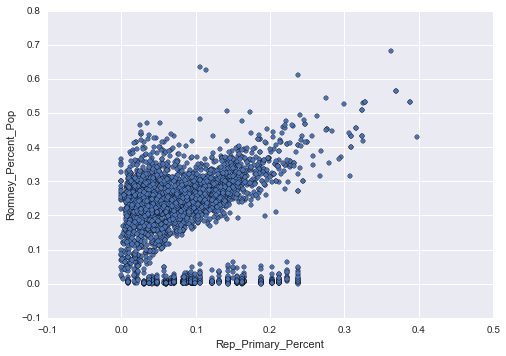

In [210]:
final_df.plot(x='Rep_Primary_Percent', y='Romney_Percent_Pop', kind='scatter')

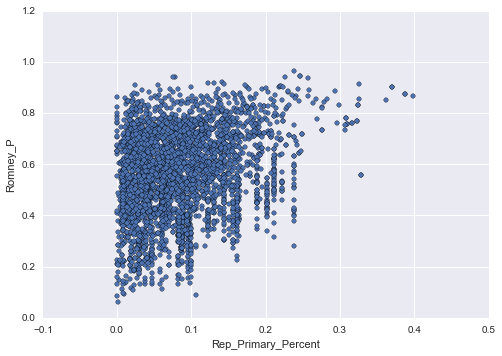

In [212]:
final_df.plot(x='Rep_Primary_Percent', y='Romney_P', kind='scatter')

In [211]:
import statsmodels as sm

In [213]:
not_NE=final_df[~final_df.State.isin(['ME','MA','CT','NH','VT'])]

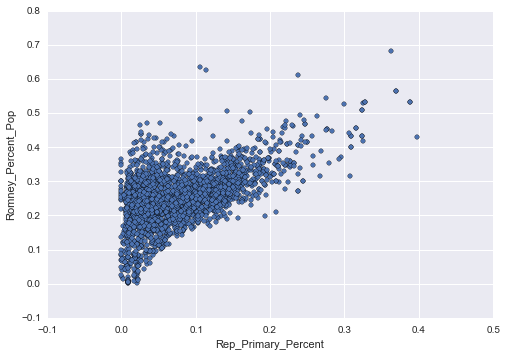

In [216]:
not_NE.plot(x='Rep_Primary_Percent', y='Romney_Percent_Pop', kind='scatter')

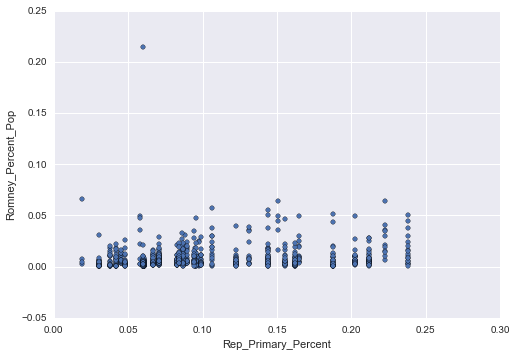

In [217]:
NE=final_df[final_df.State.isin(['ME','MA','CT','NH','VT'])]
NE.plot(x='Rep_Primary_Percent', y='Romney_Percent_Pop', kind='scatter')

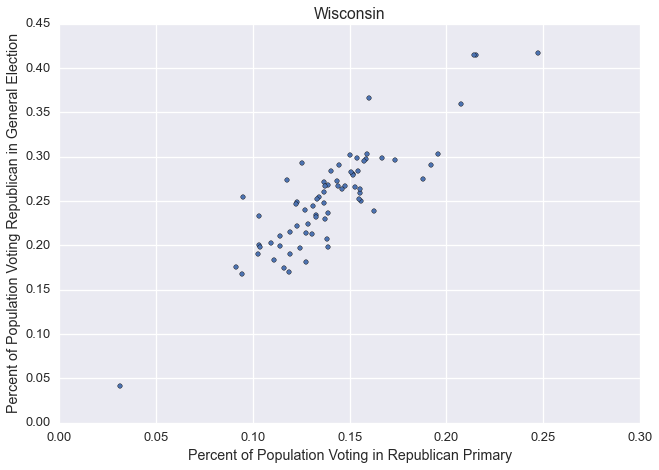

In [232]:
WI=final_df[final_df.State=='WI']
ax=WI.plot(x='Rep_Primary_Percent', y='Romney_Percent_Pop', kind='scatter', title='Wisconsin')
ax.set_xlabel("Percent of Population Voting in Republican Primary")
ax.set_ylabel("Percent of Population Voting Republican in General Election")

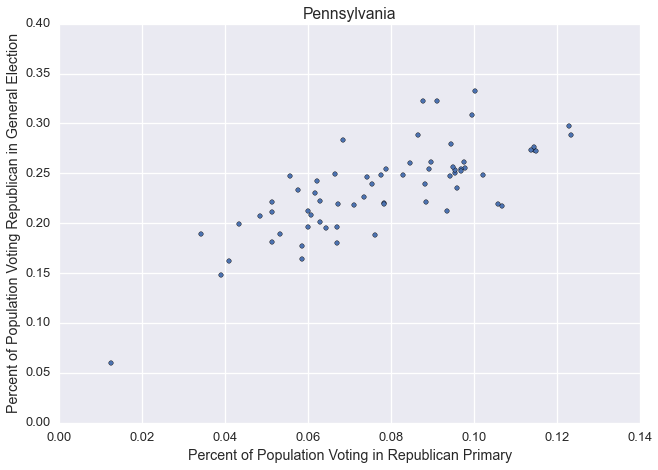

In [231]:
PA=final_df[final_df.State=='PA']
ax=PA.plot(x='Rep_Primary_Percent', y='Romney_Percent_Pop', kind='scatter', title='Pennsylvania')
ax.set_xlabel("Percent of Population Voting in Republican Primary")
ax.set_ylabel("Percent of Population Voting Republican in General Election")

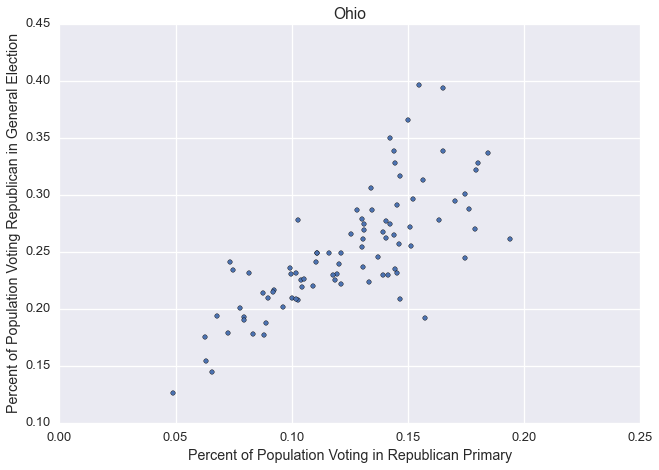

In [230]:
OH=final_df[final_df.State=='OH']
ax=OH.plot(x='Rep_Primary_Percent', y='Romney_Percent_Pop', kind='scatter', title='Ohio')
ax.set_xlabel("Percent of Population Voting in Republican Primary")
ax.set_ylabel("Percent of Population Voting Republican in General Election")

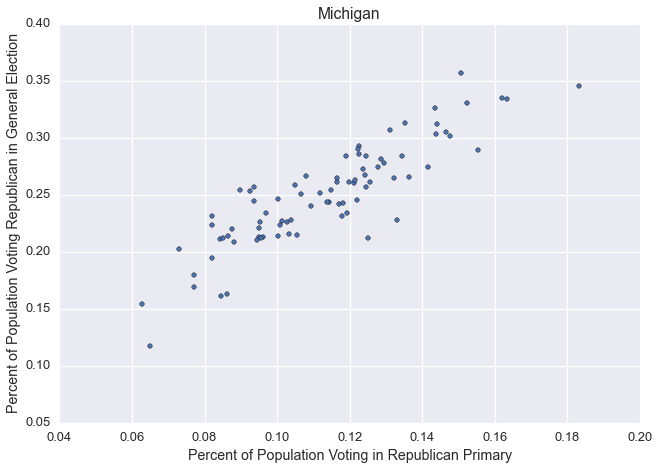

In [229]:
MI=final_df[final_df.State=='MI']
ax=MI.plot(x='Rep_Primary_Percent', y='Romney_Percent_Pop', kind='scatter', title='Michigan')
ax.set_xlabel("Percent of Population Voting in Republican Primary")
ax.set_ylabel("Percent of Population Voting Republican in General Election")

In [228]:
sns.set_context("talk", font_scale=1)

In [233]:
CO=pd.read_html?

In [234]:
CO=pd.read_html('http://www.politico.com/2012-election/results/president/colorado/')


AttributeError: 'list' object has no attribute 'head'

In [239]:
CO[3]

,0,1,2
0,Kerry,47.00%,1001725
1,Bush,51.70%,1101256
